In [ ]:
from google.colab import files
#로컬에서 압축 파일 선택
uploaded = files.upload()


Saving train.zip to train.zip


In [ ]:
import zipfile
import os

# 업로드된 파일명
# zip_file_name = 'test.zip'  # 또는 'train.zip'
zip_file_name = 'train.zip'
# 한글 파일명이 포함된 zip 파일 압축 해제
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        # 파일명을 cp949로 디코딩
        file_info.filename = file_info.filename.encode('cp437').decode('cp949')
        # 파일 추출
        zip_ref.extract(file_info, '/content/')

# 압축 해제 후 파일 확인
os.listdir('/content/')


['.config',
 'train',
 'train.zip',
 'test.zip',
 'test',
 '.ipynb_checkpoints',
 'train2',
 'sample_data']

In [ ]:
!git clone https://github.com/SUS7898/Study.git
!ls Study/main/train  # 이 부분은 저장소 구조에 따라 경로를 조정해야 할 수 있습니다.



In [ ]:
from google.colab import files
import zipfile
import os
import cv2







def load_images(path):
    # 표지판과 라벨을 매핑하는 딕셔너리
    signs = {
    "서행": 0,
    "승합자동차 통행금지": 1,
    "앞지르기금지": 2,
    "우회전금지": 3,
    "유턴금지": 4,
    "이륜자동차 및 원동기장치 자건거통행금지": 5,
    "일시정지": 6,
    "자동차 통행 금지": 7,
    "자전거 통행금지": 8,
    "정차주차금지": 9,
    "주차금지": 10,
    "직진금지": 11,
    "진입금지": 12,
    "차간거리확보": 13,
    "차중량제한": 14,
    "최고속도제한": 15,
    "최저속도제한": 16,
    "통행금지 표시판": 17,
    "화물자동차 통행금지": 18,
    "+자형교차로": 19,
    "2방향통행": 20,
    "T자형교차로": 21,
    "Y형교차로": 22,
    "우합류도로": 23,
    "좌합류도로": 24,
    "회전교차로": 25,
    "ㅏ자형교차로": 26,
    "ㅓ자형교차로": 27,
    "보행자전용도로": 28,
    "양측방통행": 29,
    "어린이보호구역": 30,
    "우측면통행": 31,
    "우회전": 32,
    "유턴": 33,
    "자동차전용도로": 34,
    "자전거전용도로": 35,
    "자전거전용차로": 36,
    "자전거주차장": 37,
    "자전거횡단도": 38,
    "장애인보호": 39,
    "좌우회전": 40,
    "좌회전": 41,
    "좌회전 및 유턴": 42,
    "주차장": 43,
    "직진": 44,
    "직진 및 우회전": 45,
    "직진 및 좌회전": 46,
    "회전교차로": 47,
    "횡단보도": 48
}

    images = []
    labels = []
    valid_extensions = ['.jpg', '.jpeg', '.png']  # 유효한 이미지 확장자

    for category in os.listdir(path):
        category_path = os.path.join(path, category)

        for sign in signs:
            sign_path = os.path.join(category_path, sign)
            if os.path.isdir(sign_path):
                file_list = os.listdir(sign_path)

                for file_name in file_list:
                    if os.path.splitext(file_name)[1].lower() in valid_extensions:
                        img_path = os.path.join(sign_path, file_name)
                        image = cv2.imread(img_path)
                        if image is not None:
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                            image = cv2.resize(image, (150, 150))
                            images.append(image)
                            labels.append(signs[sign])
                        else:
                            print(f"Failed to load image: {img_path}")
                    else:
                        print(f"Skipping non-image file: {file_name}")

    return images, labels

# 함수 호출
unzipped_folder_path = '/content/Study/train'
images, labels = load_images(unzipped_folder_path)


Skipping non-image file: roundabout24.gif
Skipping non-image file: pedestrian10.webp
Skipping non-image file: RightTurn12.webp
Skipping non-image file: impairment16.avif
Skipping non-image file: LeftTurn9.gif
Skipping non-image file:  parking17.gif
Skipping non-image file: Straight2.webp
Skipping non-image file: crosswalk12.webp
Skipping non-image file: crosswalk11.webp


In [ ]:
import os
import cv2

def load_images_and_labels(base_path):
    images = []
    labels = []
    valid_extensions = ['.jpg', '.jpeg', '.png']  # 유효한 이미지 확장자

    for category in ['규제표지판', '주의표지판', '지시표지판']:
        category_path = os.path.join(base_path, category)
        if os.path.isdir(category_path):  # 카테고리 경로가 디렉토리인지 확인
            for sign_folder in os.listdir(category_path):
                sign_path = os.path.join(category_path, sign_folder)
                if os.path.isdir(sign_path):  # 표지판 폴더가 디렉토리인지 확인
                    for image_file in os.listdir(sign_path):
                        _, ext = os.path.splitext(image_file)
                        if ext.lower() in valid_extensions:
                            image_path = os.path.join(sign_path, image_file)
                            image = cv2.imread(image_path)
                            if image is not None:
                                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                                image = cv2.resize(image, (150, 150))
                                images.append(image)
                                labels.append(sign_folder)  # 라벨로 폴더 이름 사용
                        else:
                            print(f"Skipping non-image file: {image_file}")

    return images, labels

# 함수 호출
train_images, train_labels = load_images_and_labels('/content/Study/train')


Skipping non-image file: Straight2.webp
Skipping non-image file:  parking17.gif
Skipping non-image file: roundabout24.gif
Skipping non-image file: LeftTurn9.gif
Skipping non-image file: impairment16.avif
Skipping non-image file: RightTurn12.webp
Skipping non-image file: pedestrian10.webp
Skipping non-image file: crosswalk12.webp
Skipping non-image file: crosswalk11.webp


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 교통법 정보 딕셔너리
traffic_laws = {
    "서행": "Slow down",
    "승합자동차 통행금지": "No entry for passenger cars",
    "앞지르기금지": "No overtaking",
    "우회전금지": "No right turn",
    "유턴금지": "No U-turns",
    "이륜자동차 및 원동기장치 자건거통행금지": "No motorcycles or motorized bicycles",
    "일시정지": "Stop",
    "자동차 통행 금지": "No vehicle traffic",
    "자전거 통행금지": "No bicycles",
    "정차주차금지": "No stopping or parking",
    "주차금지": "No parking",
    "직진금지": "No straight ahead",
    "진입금지": "No entry",
    "차간거리확보": "Maintain safe distance between cars",
    "차중량제한": "Weight limit",
    "최고속도제한": "Speed limit",
    "최저속도제한": "Minimum speed limit",
    "통행금지 표시판": "No passage",
    "화물자동차 통행금지": "No entry for freight vehicles",
    "+자형교차로": "Crossroads",
    "2방향통행": "Two-way traffic",
    "T자형교차로": "T-junction",
    "Y형교차로": "Y-junction",
    "우합류도로": "Merge to the right",
    "좌합류도로": "Merge to the left",
    "회전교차로": "Roundabout",
    "ㅏ자형교차로": "T-junction with roads to the left and right",
    "ㅓ자형교차로": "T-junction with roads to the left",
    "보행자전용도로": "Pedestrian zone",
    "양측방통행": "Traffic in both directions",
    "어린이보호구역": "School zone",
    "우측면통행": "Keep to the right",
    "우회전": "Right turn",
    "유턴": "U-turn",
    "자동차전용도로": "Motorway",
    "자전거전용도로": "Bicycle path",
    "자전거전용차로": "Bicycle lane",
    "자전거주차장": "Bicycle parking",
    "자전거횡단도": "Bicycle crossing",
    "장애인보호": "Disabled persons area",
    "좌우회전": "Left and right turn",
    "좌회전": "Left turn",
    "좌회전 및 유턴": "Left turn and U-turn",
    "주차장": "Parking area",
    "직진": "Go straight",
    "직진 및 우회전": "Go straight or turn right",
    "직진 및 좌회전": "Go straight or turn left",
    "회전교차로": "Roundabout",
    "횡단보도": "Pedestrian crossing"
}


train_dir = '/content/Study/train'
# validation_dir = '/content/validation'  # 실제 검증 데이터셋 경로로 수정
test_dir = '/content/Study/test'              # 실제 테스트 데이터셋 경로로 수정

# # 데이터 전처리
# train_datagen = ImageDataGenerator(rescale=1./255)
# validation_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(150, 150),
#         batch_size=20,
#         class_mode='categorical')

# validation_generator = validation_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(150, 150),
#         batch_size=20,
#         class_mode='categorical')

# # 모델 구축
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(len(traffic_laws), activation='softmax')  # 클래스 수에 맞게 조정
# ])

# # 모델 컴파일
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # 모델 학습
# history = model.fit(
#       train_generator,
#       steps_per_epoch=100,  # 조정 가능
#       epochs=15,  # 조정 가능
#       validation_data=validation_generator,
#       validation_steps=50)  # 조정 가능

# # 테스트 데이터셋 로드
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#         test_dir,
#         target_size=(150, 150),
#         batch_size=20,
#         class_mode='categorical',
#         shuffle=True)

# # 랜덤 이미지 선택 및 예측
# test_images, test_labels = next(test_generator)
# random_index = np.random.randint(0, test_images.shape[0])
# random_image = np.expand_dims(test_images[random_index], axis=0)
# predicted_class = np.argmax(model.predict(random_image), axis=1)[0]

# # 결과 출력
# predicted_label = list(test_generator.class_indices.keys())[predicted_class]
# print("Predicted sign:", predicted_label)
# print("Traffic law:", traffic_laws.get(predicted_label, "No law found"))


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 라벨 인코더 생성
label_encoder = LabelEncoder()
label_encoder.fit(list(traffic_laws.keys()))

# 이미지와 라벨 로드
train_images, train_labels = load_images_and_labels(train_dir)
train_labels_encoded = label_encoder.transform(train_labels)
train_labels_encoded = to_categorical(train_labels_encoded)

# 훈련 데이터와 검증 데이터로 분할
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels_encoded, test_size=0.2, random_state=42)

# 모델 생성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(traffic_laws), activation='softmax')  # 클래스 수에 맞게 조정
])

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(
    np.array(X_train), np.array(y_train),
    validation_data=(np.array(X_val), np.array(y_val)),
    epochs=15
)

# 테스트 데이터 준비
test_images, test_labels = load_images_and_labels(test_dir)
test_labels_encoded = label_encoder.transform(test_labels)
test_labels_encoded = to_categorical(test_labels_encoded)

# 테스트 데이터에 대한 예측
random_index = np.random.randint(0, len(test_images))
random_image = np.expand_dims(test_images[random_index], axis=0)
predicted_class = np.argmax(model.predict(random_image), axis=1)[0]
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

# 결과 출력
print("Predicted sign:", predicted_label)
print("Traffic law:", traffic_laws.get(predicted_label, "No law found"))


Skipping non-image file: Straight2.webp
Skipping non-image file:  parking17.gif
Skipping non-image file: roundabout24.gif
Skipping non-image file: LeftTurn9.gif
Skipping non-image file: impairment16.avif
Skipping non-image file: RightTurn12.webp
Skipping non-image file: pedestrian10.webp
Skipping non-image file: crosswalk12.webp
Skipping non-image file: crosswalk11.webp
Epoch 1/15
23/23 [==============================] - 27s 1s/step - loss: 71.7391 - accuracy: 0.0465 - val_loss: 3.7608 - val_accuracy: 0.0601
Epoch 2/15
23/23 [==============================] - 25s 1s/step - loss: 3.4381 - accuracy: 0.1888 - val_loss: 3.8582 - val_accuracy: 0.0929
Epoch 3/15
23/23 [==============================] - 25s 1s/step - loss: 2.3469 - accuracy: 0.4460 - val_loss: 3.9806 - val_accuracy: 0.1639
Epoch 4/15
23/23 [==============================] - 25s 1s/step - loss: 1.2226 - accuracy: 0.7483 - val_loss: 5.3035 - val_accuracy: 0.1749
Epoch 5/15
23/23 [==============================] - 25s 1s/step - 

Skipping non-image file: Straight2.webp
Skipping non-image file: parking17.gif
Skipping non-image file: roundabout24.gif
Skipping non-image file: LeftTurn9.gif
Skipping non-image file: impairment16.avif
Skipping non-image file: RightTurn12.webp
Skipping non-image file: pedestrian10.webp
Skipping non-image file: crosswalk12.webp
Skipping non-image file: crosswalk11.webp
1/1 [==============================] - 0s 46ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

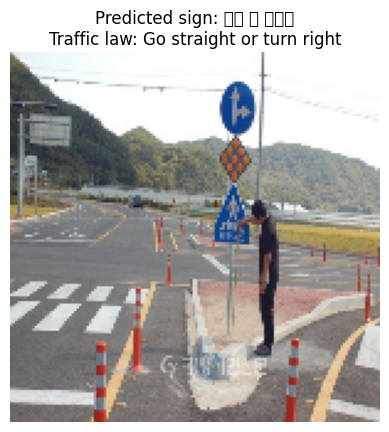

In [ ]:
import matplotlib.pyplot as plt

# 테스트 데이터 준비
test_images, test_labels = load_images_and_labels(test_dir)
test_labels_encoded = label_encoder.transform(test_labels)
test_labels_encoded = to_categorical(test_labels_encoded, num_classes=len(traffic_laws))

# 테스트 데이터에 대한 예측
random_index = np.random.randint(0, len(test_images))
random_image = np.expand_dims(test_images[random_index], axis=0)
predicted_class = np.argmax(model.predict(random_image), axis=1)[0]
predicted_label = label_encoder.inverse_transform([predicted_class])[0]


# 결과 출력
plt.imshow(test_images[random_index])
plt.title(f"Predicted sign: {predicted_label}\nTraffic law: {traffic_laws.get(predicted_label, 'No law found')}")
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 파일 업로드
uploaded = files.upload()
file_name = next(iter(uploaded))

# 이미지 로드 및 전처리
img = Image.open(BytesIO(uploaded[file_name]))
img = img.resize((150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# 예측 수행
predicted_class = np.argmax(model.predict(img_array), axis=1)[0]
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

# 결과 출력
plt.imshow(img)
plt.title(f"Predicted sign: {predicted_label}\nTraffic law: {traffic_laws.get(predicted_label, 'No law found')}")
plt.axis('off')
plt.show()


In [ ]:
# 사용자에게 모델 예측이 맞는지 확인
user_confirmation = input("Is the prediction correct? (yes/no): ").lower()

if user_confirmation == "no":
    # 미리 정의된 라벨 중에서 선택하도록 함
    print("Choose the correct label for the sign:")
    for i, label in enumerate(traffic_laws.keys(), 1):
        print(f"{i}. {label}")

    # 사용자에게 라벨 선택
    try:
        selected_label_index = int(input("Enter the number corresponding to the correct label: ")) - 1
        selected_label = list(traffic_laws.keys())[selected_label_index]

        # 수정된 라벨을 사용하여 모델 재훈련
        corrected_label_encoded = label_encoder.transform([selected_label])[0]
        corrected_label_encoded = to_categorical(corrected_label_encoded, num_classes=len(traffic_laws))

        # 이미지와 수정된 라벨을 훈련 데이터에 추가
        train_images.append(img_array)
        train_labels_encoded.append(corrected_label_encoded)

        # 모델 재훈련
        model.fit(
            np.array(train_images), np.array(train_labels_encoded),
            validation_data=(np.array(X_val), np.array(y_val)),
            epochs=15
        )

        print("Model retrained with corrected label.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")
else:
    print("Great! The prediction is correct.")